In [1]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
import Orange
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd
import datetime as dt


In [2]:
#Read CSV file into data frame
NoShow_Initialdata=pd.read_csv('C:/Users/kanka/OneDrive/Desktop/Fall 2019/ML/Project/noshowappointments/NoShowDataset.csv',delimiter=',')

In [3]:
#NoShow_Initialdata.dtypes
#print(NoShow_Initialdata)
print('The initial distribution of target values counts in No-show target column')
print(NoShow_Initialdata['No-show'].value_counts())


The initial distribution of target values counts in No-show target column
No     88208
Yes    22319
Name: No-show, dtype: int64


In [4]:
#calculating the number of days from the scheduled time to actual appointment time
NoShow_Initialdata['ScheduledDay']=pd.to_datetime(NoShow_Initialdata['ScheduledDay'])
NoShow_Initialdata['AppointmentDay']=pd.to_datetime(NoShow_Initialdata['AppointmentDay'])
NoShow_Initialdata['NumberOfDays']=(NoShow_Initialdata['AppointmentDay']-NoShow_Initialdata['ScheduledDay']).dt.days
NoShow_Finaldata=NoShow_Initialdata.drop(['ScheduledDay', 'AppointmentDay','Neighbourhood'], axis=1)

#checking that number of days is not in negatives
NoShow_Finaldata=NoShow_Finaldata[(NoShow_Finaldata['NumberOfDays']) > -1]

#Checking age is not less than zero
NoShow_Finaldata=NoShow_Finaldata[(NoShow_Finaldata['Age']) > 0]
print(NoShow_Finaldata)
print(NoShow_Finaldata['No-show'].value_counts())

           PatientId  AppointmentID Gender  Age  Scholarship  Hipertension  \
5       9.598510e+13        5626772      F   76            0             1   
6       7.336880e+14        5630279      F   23            0             0   
7       3.449830e+12        5630575      F   39            0             0   
9       7.812460e+13        5629123      F   19            0             0   
10      7.345360e+14        5630213      F   30            0             0   
11      7.542950e+12        5620163      M   29            0             0   
12      5.666550e+14        5634718      F   22            1             0   
13      9.113950e+14        5636249      M   28            0             0   
14      9.988470e+13        5633951      F   54            0             0   
15      9.994839e+10        5620206      F   15            0             0   
16      8.457440e+13        5633121      M   50            0             0   
17      1.479500e+13        5633460      F   40            1    

In [5]:
encode_category=LabelEncoder()

In [6]:
NoShow_Finaldata['Gender']=encode_category.fit_transform(NoShow_Finaldata['Gender'])

In [7]:
print(NoShow_Finaldata)

           PatientId  AppointmentID  Gender  Age  Scholarship  Hipertension  \
5       9.598510e+13        5626772       0   76            0             1   
6       7.336880e+14        5630279       0   23            0             0   
7       3.449830e+12        5630575       0   39            0             0   
9       7.812460e+13        5629123       0   19            0             0   
10      7.345360e+14        5630213       0   30            0             0   
11      7.542950e+12        5620163       1   29            0             0   
12      5.666550e+14        5634718       0   22            1             0   
13      9.113950e+14        5636249       1   28            0             0   
14      9.988470e+13        5633951       0   54            0             0   
15      9.994839e+10        5620206       0   15            0             0   
16      8.457440e+13        5633121       1   50            0             0   
17      1.479500e+13        5633460       0   40    

In [8]:
y = NoShow_Finaldata['No-show']
x = NoShow_Finaldata.drop('No-show', axis=1)
print(x)

           PatientId  AppointmentID  Gender  Age  Scholarship  Hipertension  \
5       9.598510e+13        5626772       0   76            0             1   
6       7.336880e+14        5630279       0   23            0             0   
7       3.449830e+12        5630575       0   39            0             0   
9       7.812460e+13        5629123       0   19            0             0   
10      7.345360e+14        5630213       0   30            0             0   
11      7.542950e+12        5620163       1   29            0             0   
12      5.666550e+14        5634718       0   22            1             0   
13      9.113950e+14        5636249       1   28            0             0   
14      9.988470e+13        5633951       0   54            0             0   
15      9.994839e+10        5620206       0   15            0             0   
16      8.457440e+13        5633121       1   50            0             0   
17      1.479500e+13        5633460       0   40    

[0.28640421 0.30074175 0.00903309 0.2080864  0.0031889  0.00444584
 0.00272952 0.0026145  0.0050978  0.00366879 0.17398919]


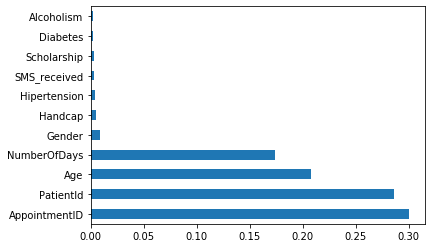

In [9]:
warnings.filterwarnings("ignore")
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [10]:
#Undersampling using stratify'

RM = RandomUnderSampler()

#Initial number of 'Yes' and 'No'
uniqueValues, occurCount = np.unique(y, return_counts=True)
print("Initial count of distribution of outcome")
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)


#Applied smote alogorithm
x, y = RM.fit_sample(x, y)

#values after smote algorithm
uniqueValues, occurCount = np.unique(y, return_counts=True)
print("Smote distribution outcome")
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)



Initial count of distribution of outcome
Unique Values :  ['No' 'Yes']
Occurrence Count :  [49894 19934]
Smote distribution outcome
Unique Values :  ['No' 'Yes']
Occurrence Count :  [19934 19934]


Text(0, 0.5, 'Accuracy_rate')

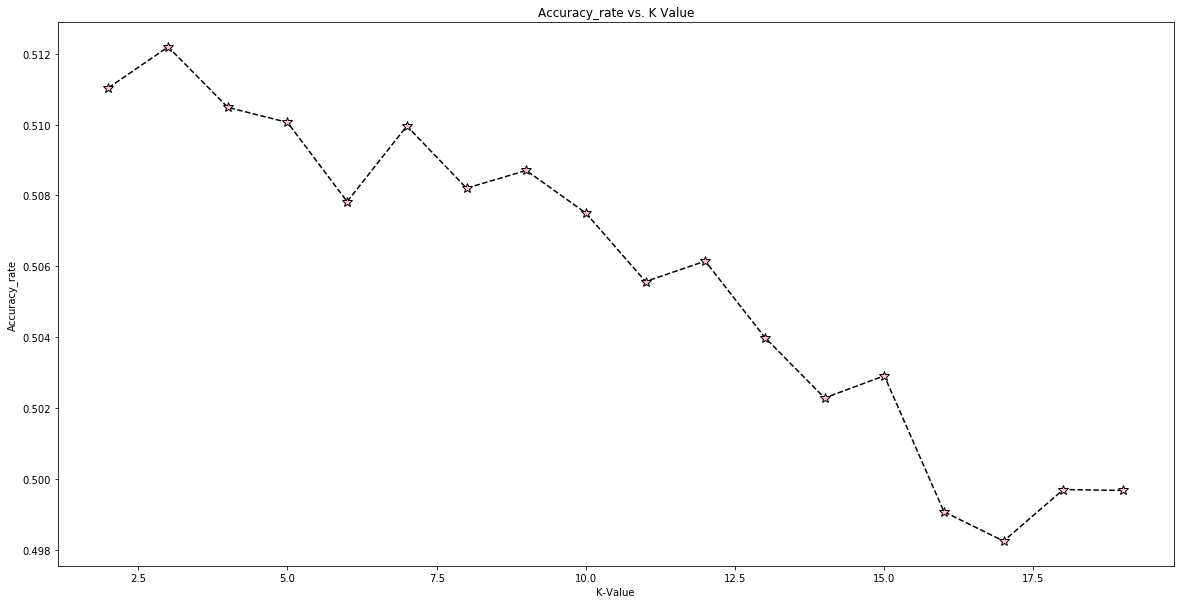

In [20]:

Accuracy_rate = []
for i in range (2,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x,y)
# calculate scores
    cv_scores = cross_val_score(knn, x, y, cv=10)

    Accuracy_rate.append(cv_scores.mean())
   # print(i)
    #print(cv_scores.mean())

    
    
plt.figure(figsize=(20,10))
plt.plot(range(2,20),Accuracy_rate,color='black', linestyle='dashed',marker='*',markerfacecolor='pink', markersize=10)
plt.title('Accuracy_rate vs. K Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy_rate')

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=12)
neigh.fit(x,y)
# calculate scores
cv_scores = cross_val_score(neigh, x, y, cv=10)
print(cv_scores)
print('Accuracy of KNN model after k-cross validation for under-sampled data')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(neigh, x, y, cv=10)
print('confusion matrix')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = neigh.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Naves bayes algorithm
NavieBayes = GaussianNB()
#train the algorithm on training data 
NavieBayes.fit(x,y)
#predict using the testing data
# calculate scores
cv_scores = cross_val_score(NavieBayes, x, y, cv=10)
print(cv_scores)
print('Accuracy of Navie-Bayes model after k-cross validation under-sampled data')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(NavieBayes, x, y, cv=10)
print('confusion matrix')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = NavieBayes.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Navie-Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(x,y)
cv_scores = cross_val_score(decision_tree, x, y, cv=10)
print(cv_scores)
print('Accuracy of Navie-Bayes model after k-cross validation under-sampled data')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(decision_tree, x, y, cv=10)
print('confusion matrix')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = decision_tree.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
     

In [ ]:
RandomForest=RandomForestClassifier(n_estimators=100)
RandomForest.fit(x,y)
cv_scores = cross_val_score(RandomForest, x, y, cv=10)
print(cv_scores)
print('Accuracy of RandomForest model after k-cross validation')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(RandomForest, x, y, cv=10)
print('Confusion matrix for Random Forest model')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = RandomForest.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for RandomForest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
Bagging_Model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
Bagging_Model.fit(x,y)

cv_scores = cross_val_score(Bagging_Model, x, y, cv=10)
print(cv_scores)
print('Accuracy of Bagging ensemble model after k-cross validation')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(Bagging_Model, x, y, cv=10)
print('Confusion matrix for Bagging ensemble model')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = Bagging_Model.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Bagging')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
Ada_boosting = AdaBoostClassifier(n_estimators=100)
Ada_boosting.fit(x,y)
cv_scores = cross_val_score(Ada_boosting, x, y, cv=10)
print(cv_scores)
print('Accuracy of boosting classifier model after k-cross validation')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(Ada_boosting, x, y, cv=10)
print('confusion matrix')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = Ada_boosting.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for Boosting')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

    

In [ ]:
import xgboost
XG_Boosting = xgboost.XGBClassifier()
XG_Boosting.fit(x,y)
cv_scores = cross_val_score(XG_Boosting, x, y, cv=10)
print(cv_scores)
print('Accuracy of XGboosting ensemble model after k-cross validation')
print(cv_scores.mean())
confusion_matrix_predict=cross_val_predict(XG_Boosting, x, y, cv=10)
print('confusion matrix')
confusion_matrix_data=confusion_matrix(y, confusion_matrix_predict)
print(confusion_matrix_data)
print(classification_report(y,confusion_matrix_predict))

probs = XG_Boosting.predict_proba(x)
preds = probs[:,1]
#print(len(preds))
fpr, tpr, threshold = metrics.roc_curve(y,preds,pos_label='Yes')

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# ROC curve code
plt.title('Receiver Operating Characteristic for XGBoosting')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
